# Usage Demo : 


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import midi
import glob
import numpy as np
import random
import pretty_midi
import seaborn as sns
import matplotlib.pyplot as plt
from mgeval import core, utils
from sklearn.model_selection import LeaveOneOut


```
'avg_IOI',
'avg_pitch_shift',
'bar_pitch_class_histogram',
'bar_used_note',
'bar_used_pitch',
'chord_dependency',
'note_length_hist',
'note_length_transition_matrix',
'pitch_class_transition_matrix',
'pitch_range',
'total_pitch_class_histogram',
'total_used_note',
'total_used_pitch'
```

## Absolute measurement: statistic analysis


Assign dataset path

In [16]:
set1 = glob.glob('d:/thesis_code/model_fulldata1/samples/sessiontune45840_transposed/temp*.mid')
len(set1)

50

construct empty dictionary to fill in measurement across samples

In [17]:
num_samples = len(set1)

In [18]:
set1_eval = {
    'total_used_pitch':np.zeros((num_samples,1)),
    'total_pitch_class_histogram':np.zeros((num_samples,12)),
    'pitch_range': np.zeros((num_samples,1)),
    'avg_pitch_shift': np.zeros((num_samples,1))
}

metrics_list = list(set1_eval.keys())

for i in range(0, num_samples):
    feature = core.extract_feature(set1[i])
    
    for j, metric in enumerate(metrics_list):
        set1_eval[metrics_list[j]][i] = getattr(core.metrics(), metrics_list[j])(feature)

d:/thesis_code/model_fulldata1/samples/sessiontune45840_transposed\temp_1.0_0.mid
d:/thesis_code/model_fulldata1/samples/sessiontune45840_transposed\temp_1.0_1.mid
d:/thesis_code/model_fulldata1/samples/sessiontune45840_transposed\temp_1.0_10.mid
d:/thesis_code/model_fulldata1/samples/sessiontune45840_transposed\temp_1.0_11.mid
d:/thesis_code/model_fulldata1/samples/sessiontune45840_transposed\temp_1.0_12.mid
d:/thesis_code/model_fulldata1/samples/sessiontune45840_transposed\temp_1.0_13.mid
d:/thesis_code/model_fulldata1/samples/sessiontune45840_transposed\temp_1.0_14.mid
d:/thesis_code/model_fulldata1/samples/sessiontune45840_transposed\temp_1.0_15.mid
d:/thesis_code/model_fulldata1/samples/sessiontune45840_transposed\temp_1.0_16.mid
d:/thesis_code/model_fulldata1/samples/sessiontune45840_transposed\temp_1.0_17.mid
d:/thesis_code/model_fulldata1/samples/sessiontune45840_transposed\temp_1.0_18.mid
d:/thesis_code/model_fulldata1/samples/sessiontune45840_transposed\temp_1.0_19.mid
d:/the

repeat for second dataset

In [19]:
set2= glob.glob('d:/data/folkdataset/4_transposed_split_4bars/*.mid')
random.shuffle(set2)
set2 = set2[:num_samples]

In [20]:
set2_eval = {
    'total_used_pitch':np.zeros((num_samples,1)),
    'total_pitch_class_histogram':np.zeros((num_samples,12)),
    'pitch_range': np.zeros((num_samples,1)),
    'avg_pitch_shift': np.zeros((num_samples,1))
}

for i in range(0, num_samples):
    feature = core.extract_feature(set2[i])
    
    for j, metric in enumerate(metrics_list):
        set2_eval[metrics_list[j]][i] = getattr(core.metrics(), metrics_list[j])(feature)


d:/data/folkdataset/4_transposed_split_4bars\sessiontune17105_transposed.mid_21.mid
d:/data/folkdataset/4_transposed_split_4bars\sessiontune16409_transposed.mid_7.mid
d:/data/folkdataset/4_transposed_split_4bars\sessiontune18731_transposed.mid_2.mid
d:/data/folkdataset/4_transposed_split_4bars\sessiontune1436_transposed.mid_9.mid
d:/data/folkdataset/4_transposed_split_4bars\sessiontune20663_transposed.mid_21.mid
d:/data/folkdataset/4_transposed_split_4bars\sessiontune22609_transposed.mid_13.mid
d:/data/folkdataset/4_transposed_split_4bars\sessiontune10911_transposed.mid_22.mid
d:/data/folkdataset/4_transposed_split_4bars\sessiontune1300_transposed.mid_70.mid
d:/data/folkdataset/4_transposed_split_4bars\sessiontune13162_transposed.mid_14.mid
d:/data/folkdataset/4_transposed_split_4bars\sessiontune19024_transposed.mid_11.mid
d:/data/folkdataset/4_transposed_split_4bars\sessiontune19214_transposed.mid_9.mid
d:/data/folkdataset/4_transposed_split_4bars\sessiontune15817_transposed.mid_27.mi

statistic analysis: absolute measurement

In [21]:
for i in range(0, len(metrics_list)):
    print metrics_list[i] + ':'
    print '------------------------'
    print ' generated'
    print '  mean: ', np.mean(set1_eval[metrics_list[i]], axis=0)
    print '  std: ', np.std(set1_eval[metrics_list[i]], axis=0)

    print '------------------------'
    print ' training'
    print '  mean: ', np.mean(set2_eval[metrics_list[i]], axis=0)
    print '  std: ', np.std(set2_eval[metrics_list[i]], axis=0)


avg_pitch_shift:
------------------------
 generated
  mean:  [3.0121095]
  std:  [0.39500248]
------------------------
 training
  mean:  [2.76917768]
  std:  [0.65960693]
pitch_range:
------------------------
 generated
  mean:  [28.78]
  std:  [9.25049188]
------------------------
 training
  mean:  [14.98]
  std:  [4.03231943]
total_pitch_class_histogram:
------------------------
 generated
  mean:  [0.17163036 0.00625427 0.12956833 0.00142651 0.23393163 0.08227789
 0.00607075 0.16279288 0.00746377 0.11581528 0.00710549 0.07566284]
  std:  [0.05851826 0.03938559 0.04281502 0.00365274 0.14354739 0.06757144
 0.00668004 0.04999621 0.03655628 0.04861891 0.00987233 0.04107304]
------------------------
 training
  mean:  [0.22393032 0.00098398 0.12938717 0.00078249 0.17819492 0.06431693
 0.00585173 0.16677335 0.00377612 0.1420285  0.00227996 0.08169453]
  std:  [0.11040226 0.00492185 0.06892442 0.00383343 0.05945336 0.07660503
 0.01429143 0.0859282  0.0238049  0.11174884 0.00999201 0.074

## Relative measurement: generalizes the result among features with various dimensions


the features are sum- marized to 
- the intra-set distances
- the difference of intra-set and inter-set distances.

exhaustive cross-validation for intra-set distances measurement

In [22]:
loo = LeaveOneOut()
loo.get_n_splits(np.arange(num_samples))
set1_intra = np.zeros((num_samples, len(metrics_list), num_samples-1))
set2_intra = np.zeros((num_samples, len(metrics_list), num_samples-1))
for i in range(len(metrics_list)):
    for train_index, test_index in loo.split(np.arange(num_samples)):
        set1_intra[test_index[0]][i] = utils.c_dist(set1_eval[metrics_list[i]][test_index], set1_eval[metrics_list[i]][train_index])
        set2_intra[test_index[0]][i] = utils.c_dist(set2_eval[metrics_list[i]][test_index], set2_eval[metrics_list[i]][train_index])


exhaustive cross-validation for inter-set distances measurement

In [23]:
loo = LeaveOneOut()
loo.get_n_splits(np.arange(num_samples))
sets_inter = np.zeros((num_samples, len(metrics_list), num_samples))

for i in range(len(metrics_list)):
    for train_index, test_index in loo.split(np.arange(num_samples)):
        sets_inter[test_index[0]][i] = utils.c_dist(set1_eval[metrics_list[i]][test_index], set2_eval[metrics_list[i]])

visualization of intra-set and inter-set distances

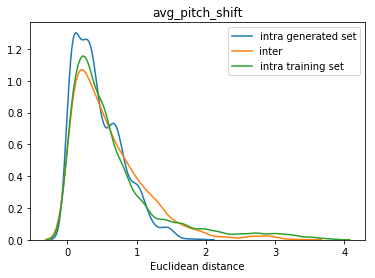

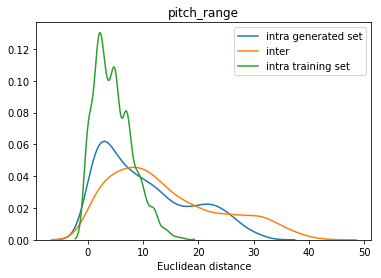

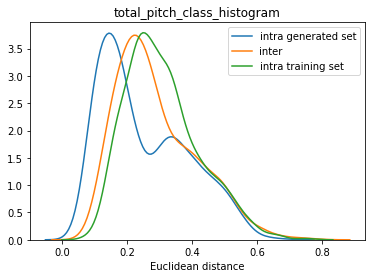

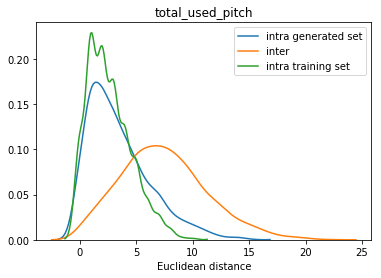

In [24]:
plot_set1_intra = np.transpose(set1_intra,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_set2_intra = np.transpose(set2_intra,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_sets_inter = np.transpose(sets_inter,(1, 0, 2)).reshape(len(metrics_list), -1)
for i in range(0,len(metrics_list)):
    sns.kdeplot(plot_set1_intra[i], label='intra generated set')
    sns.kdeplot(plot_sets_inter[i], label='inter')
    sns.kdeplot(plot_set2_intra[i], label='intra training set')

    plt.title(metrics_list[i])
    plt.xlabel('Euclidean distance')
    plt.show()

the difference of intra-set and inter-set distances.

In [15]:
for i in range(0, len(metrics_list)):
    print metrics_list[i] + ':'
    print '------------------------'
    print ' generated set'
    print '  Kullback–Leibler divergence:',utils.kl_dist(plot_set1_intra[i], plot_sets_inter[i])
    print '  Overlap area:', utils.overlap_area(plot_set1_intra[i], plot_sets_inter[i])
    
    print ' training set'
    print '  Kullback–Leibler divergence:',utils.kl_dist(plot_set2_intra[i], plot_sets_inter[i])
    print '  Overlap area:', utils.overlap_area(plot_set2_intra[i], plot_sets_inter[i])
    

avg_pitch_shift:
------------------------
 generated set
  Kullback–Leibler divergence: 0.12248390324527345
  Overlap area: 0.746770228134
 training set
  Kullback–Leibler divergence: 0.027784496909760818
  Overlap area: 0.87445521996
pitch_range:
------------------------
 generated set
  Kullback–Leibler divergence: 0.0527956745198041
  Overlap area: 0.750372016772
 training set
  Kullback–Leibler divergence: 0.07652826929759766
  Overlap area: 0.319063271607
total_pitch_class_histogram:
------------------------
 generated set
  Kullback–Leibler divergence: 0.13341981822365165
  Overlap area: 0.75196690966
 training set
  Kullback–Leibler divergence: 0.09834655092812636
  Overlap area: 0.838418700888
total_used_pitch:
------------------------
 generated set
  Kullback–Leibler divergence: 0.47190330974698136
  Overlap area: 0.456094202647
 training set
  Kullback–Leibler divergence: 0.23123176253250577
  Overlap area: 0.231175230028


In [8]:
len(set2), set2[:5]

(50,
 ['d:/data/folkdataset/4_transposed_split_4bars\\sessiontune15738_transposed.mid_22.mid',
  'd:/data/folkdataset/4_transposed_split_4bars\\sessiontune19693_transposed.mid_15.mid',
  'd:/data/folkdataset/4_transposed_split_4bars\\sessiontune22362_transposed.mid_13.mid',
  'd:/data/folkdataset/4_transposed_split_4bars\\sessiontune20409_transposed.mid_16.mid',
  'd:/data/folkdataset/4_transposed_split_4bars\\sessiontune19589_transposed.mid_34.mid'])